# "Hello World": QISKit Edition

### This is just a quick Jupyter Notebook implementing some quantum computing concepts like superposition and entanglement

First off, let's import some tools from QISKit:

In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


Now let's assign some variable names:

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

Above, we've allocated two qubits in a quantum register, and are allocating two bits in a classical register. We've gone ahead and said that our quantum circuit will be handling both our qubits and our bits

Now let's perform some very basic operations on these qubits. Let's operate on our first qubit with a Hadamard gate to create a superposition state. Then, let's Controlled-NOT the two qubits together, using our first qubit as the control, and the second qubit as our target. This effectively "entangles" the two qubits together:

In [3]:
qc.h(q[0])
qc.cx(q[0], q[1])

qc.measure(q, c) # We've gone ahead and measured the result of our operations above
# storing the result our of measurements on q in our classical register c

Above, we started with two qubits, each initially in the state: $$|0\rangle$$ 

Then, we apply a Hadamard gate to the first qubit to achieve superposition:

$$H|0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$$

In the next line, we entangle the two qubits together using a C-NOT gate:

$$C-NOT(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle)|0\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$  

<br>
<br>
<br>


The operations we performed on our two qubits can be represented visually as a quantum "score" using `matplotlib_circuit_drawer`:

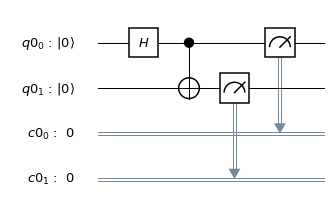

In [6]:
from qiskit.tools.visualization import circuit_drawer as drawer 

drawer(qc, output = 'mpl')

Let's run this thing on a local simulator:

In [7]:
from qiskit import Aer

backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1000)
sim_result = job_sim.result()
print(sim_result.get_counts(qc))

{'00': 492, '11': 508}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


We can take advantage of QISKits visualization toolbox by importing a neat histogram function, and then plotting the results of our job above:

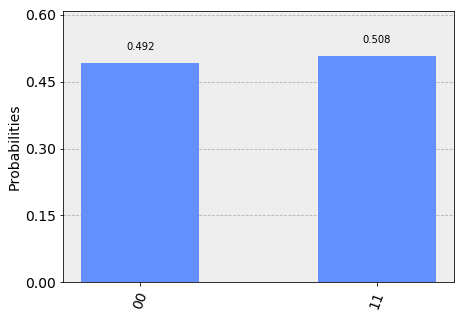

In [8]:
from qiskit.tools.visualization import plot_histogram
counts = sim_result.get_counts(qc)
plot_histogram(counts)

After measuring $\frac{|00\rangle + |11\rangle}{\sqrt{2}}$, we would expect that half the time this superposition state should collapse to $|00\rangle$, and half the time the state should collapse to $|11\rangle$. From the above histogram, it looks like our simulator gave us the result we were expecting.  
<br>
<br>
<br>
Now let's do the cool part; let's run this (simple) circuit on a REAL Quantum Computer

First, we need to load our IBM Q Experience account. Then we can just print the list of backends our IBMQ provider has:

In [10]:
from qiskit import IBMQ

IBMQ.load_accounts()
for backend in IBMQ.backends():
    print(backend)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


ibmqx4
ibmq_16_melbourne
ibmq_qasm_simulator


We see we have a list of the available backends, some simulators, and some real devices. Let's choose one of the real devices as a backend to run our job:

In [11]:
backend_real = IBMQ.get_backend('ibmq_16_melbourne')
job_real = execute(qc, backend_real, shots=1000)
real_result = job_real.result()
counts = real_result.get_counts(qc)
print(counts)

{'01': 51, '00': 487, '11': 377, '10': 85}


Let's again make a nice visualization of the results:

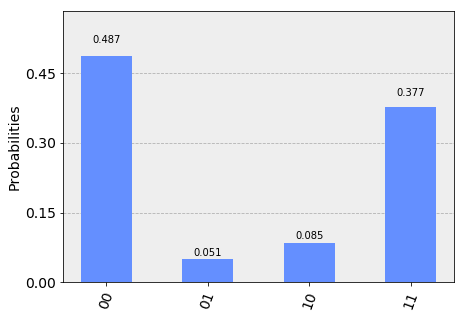

In [12]:
plot_histogram(real_result.get_counts(qc))

Notice that we don't get 50/50 $|00\rangle$ and $|11\rangle$ here as we did with the simulator. Real quantum processors suffer from noise, so while those two states do appear to be the most likely to occur, we also see that we have some instances of $|01\rangle$ and $|10\rangle$

In [24]:
print("The circuit has the following depth (number of gates): {depth}".format(depth = qc.depth()))
print("The circuit has the following width (number of qubits): {width}".format(width = qc.width()))
print("The circuit has the following \"Quantum Volume\" (depth times width): {volume}".format(volume = qc.width()*qc.depth()))

The circuit has the following depth (number of gates): 3
The circuit has the following width (number of qubits): 2
The circuit has the following "Quantum Volume" (depth times width): 6
